In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

读取美国的阿尔茨海默病和健康老龄化数据

In [61]:
# 读取数据集
data = pd.read_csv('Alzheimer Disease and Healthy Aging Data In US.csv')


#数据清洗
data=data.dropna(axis=1,how='all')
data.replace(".", np.NaN, inplace=True)#数据清洗，将其都转为数值
data.to_csv('temp.csv')
data=pd.read_csv('temp.csv')

# 查看数据集前5行
data.head()

C:\Users\19297\AppData\Local\Temp\ipykernel_63804\2140883506.py:2: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Alzheimer Disease and Healthy Aging Data In US.csv')


,Unnamed: 0,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE


# 3.1 数据摘要和可视化


  在这个数据集中，显然只有'Data_Value','Data_Value_Alt','Low_Confidence_Limit','High_Confidence_Limit','Sample_Size'是数值属性，其他的Class','Topic','Question','Data_Value_Unit'等标签均可以归类为标称属性。

In [3]:
#数值属性
numeric_attrs =['Data_Value','Data_Value_Alt','Low_Confidence_Limit','High_Confidence_Limit'] 
#标称属性
nominal_attrs=['YearStart','YearEnd','LocationAbbr','LocationDesc','Datasource','Class','Topic','Question','Data_Value_Unit','DataValueTypeID','Data_Value_Type','StratificationCategory1','Stratification1','StratificationCategory2','Stratification2','Geolocation','ClassID','TopicID','QuestionID','LocationID','StratificationCategoryID1','StratificationID1','StratificationCategoryID2','StratificationID2']

In [4]:
    
def data_summary(data,nominal_attrs, numeric_attrs):
    """
    对数据集进行数据摘要
    :param data: 数据集
    """
    # 对标称属性进行频数统计并输出
    for col in nominal_attrs:
        freq = data[col].value_counts()
        print("标称属性 '{}' 的频数统计：\n{}".format(col, freq))
        print()
    
    # 对数值属性进行五数概括和缺失值统计并输出
    for col in numeric_attrs:
        if data[col].dtype=='object':
            da=data[col].astype('float32')
        
        print("数值属性 '{}' 的五数概括和缺失值统计：".format(col))
        count_null = data[col].isnull().sum()
        print("  均值：{:.2f}".format(data[col].mean()))
        print("  标准差：{:.2f}".format(data[col].std()))
        print("  最小值：{:.2f}".format(data[col].min()))
        print("  25% 分位数：{:.2f}".format(data[col].quantile(q=0.25)))
        print("  50% 分位数：{:.2f}".format(data[col].quantile(q=0.5)))
        print("  75% 分位数：{:.2f}".format(data[col].quantile(q=0.75)))
        print("  最大值：{:.2f}".format(data[col].max()))
        print("  缺失值个数：{}".format(count_null))
        print()
    


In [5]:
data_summary(data,nominal_attrs, numeric_attrs)

标称属性 'YearStart' 的频数统计：
2015    45980
2020    36006
2019    34354
2016    34145
2017    33429
2018    30548
Name: YearStart, dtype: int64

标称属性 'YearEnd' 的频数统计：
2020    46966
2015    35020
2019    34354
2016    34145
2017    33429
2018    30548
Name: YearEnd, dtype: int64

标称属性 'LocationAbbr' 的频数统计：
US      4644
WEST    4638
NRE     4614
MDW     4611
OR      4565
NY      4557
SOU     4542
UT      4222
OH      3955
GA      3951
MD      3919
HI      3907
TN      3879
MI      3796
VA      3758
FL      3753
ME      3733
TX      3699
NV      3696
DC      3684
WV      3682
MS      3677
PA      3648
NM      3635
AL      3633
KY      3623
AK      3611
SC      3592
NJ      3589
AZ      3582
MO      3573
IL      3571
IN      3570
WI      3569
LA      3563
MN      3555
NE      3546
CT      3543
RI      3534
OK      3526
SD      3526
ND      3514
KS      3510
ID      3507
IA      3501
AR      3498
WY      3494
CA      3447
CO      3390
NC      3349
WA      3348
MT      3348
DE      3346
NH      32

  50% 分位数：26.90
  75% 分位数：49.10
  最大值：99.60
  缺失值个数：70009

数值属性 'High_Confidence_Limit' 的五数概括和缺失值统计：
  均值：42.24
  标准差：26.17
  最小值：1.40
  25% 分位数：19.00
  50% 分位数：38.50
  75% 分位数：64.70
  最大值：100.00
  缺失值个数：70009



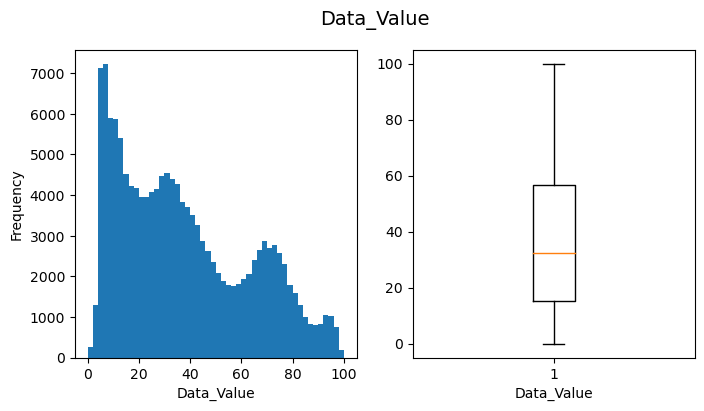

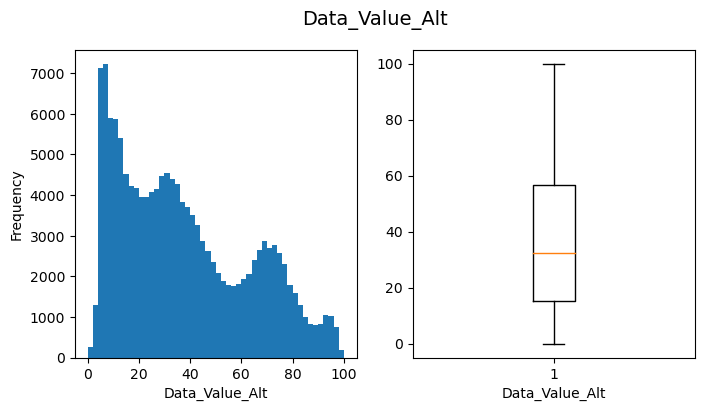

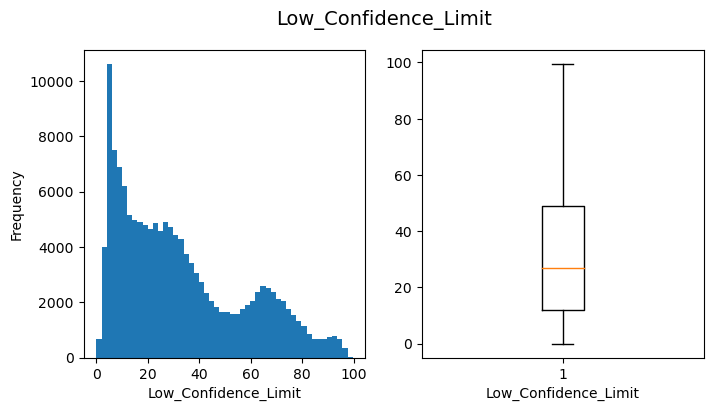

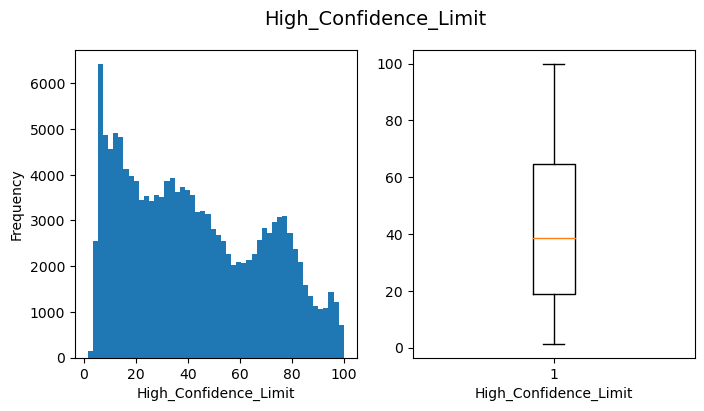

In [7]:
def data_visual(data,numeric_attrs): 
    # 对数值属性进行可视化分析
    for col in numeric_attrs:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
        fig.suptitle("{}".format(col), fontsize=14)
        axs[0].hist(data[col].dropna(),bins=50)
        axs[0].set_xlabel(col)
        axs[0].set_ylabel("Frequency")
        axs[1].boxplot(data[col].dropna())
        axs[1].set_xlabel(col)
        plt.show()
data_visual(data,numeric_attrs)

由直方图可以看到，这四个数据出现在0—30中比较密集，而80到100区间的数据则较少

In [30]:
def datacut(df):
    '''
    因为数据较多，为了更好得对数据可视化，所以 将其分成区间，并将图和表结合起来完成可视化
    
    '''
    #gcut = pd.cut(df,10,right=False) 
   # gcut.value_counts()
    # 频率分布情况  把分组区间匹配到表格中
    gcut = pd.cut(df,10,right = False) 
    gcut_count = gcut.value_counts(sort = True)
    r_zj = pd.DataFrame(gcut_count)
    r_zj.rename(columns = {gcut_count.name:'频数'},inplace = True)
    r_zj['频率'] = r_zj['频数']/r_zj['频数'].sum()
    #r_zj['累计频率'] = r_zj['频率'].cumsum()
    r_zj['频率%'] = r_zj['频率'].apply(lambda x:"%.2f%%" %(x*100))
    #r_zj['累计频率%'] = r_zj['累计频率'].apply(lambda x:"%.2f%%" %(x*100))
    return r_zj



In [31]:
data_value=datacut(data['Data_Value'].dropna())
data_value.style.bar(subset=['频率'])  

,频数,频率,频率%
"[10.0, 20.0)",24185,0.167221,16.72%
"[0.0, 10.0)",21791,0.150668,15.07%
"[30.0, 40.0)",20736,0.143374,14.34%
"[20.0, 30.0)",20588,0.142350,14.24%
"[40.0, 50.0)",14611,0.101024,10.10%
"[70.0, 80.0)",12119,0.083794,8.38%
"[60.0, 70.0)",11921,0.082425,8.24%
"[50.0, 60.0)",9340,0.064579,6.46%
"[80.0, 90.0)",5500,0.038028,3.80%
"[90.0, 100.1)",3838,0.026537,2.65%


In [24]:
data_value_alt=datacut(data['Data_Value_Alt'].dropna())
data_value_alt.style.bar(subset=['频率'])  

,频数,频率,频率%
"[10.0, 20.0)",24185,0.167221,16.72%
"[0.0, 10.0)",21791,0.150668,15.07%
"[30.0, 40.0)",20736,0.143374,14.34%
"[20.0, 30.0)",20588,0.142350,14.24%
"[40.0, 50.0)",14611,0.101024,10.10%
"[70.0, 80.0)",12119,0.083794,8.38%
"[60.0, 70.0)",11921,0.082425,8.24%
"[50.0, 60.0)",9340,0.064579,6.46%
"[80.0, 90.0)",5500,0.038028,3.80%
"[90.0, 100.1)",3838,0.026537,2.65%


In [25]:
Low_Confidence_Limit=datacut(data['Low_Confidence_Limit'].dropna())
Low_Confidence_Limit.style.bar(subset=['频率'])  

,频数,频率,频率%
"[0.0, 9.96)",29638,0.205174,20.52%
"[9.96, 19.92)",26000,0.179989,18.00%
"[19.92, 29.88)",23736,0.164316,16.43%
"[29.88, 39.84)",18909,0.130901,13.09%
"[59.76, 69.72)",11839,0.081957,8.20%
"[39.84, 49.8)",10576,0.073214,7.32%
"[69.72, 79.68)",8791,0.060857,6.09%
"[49.8, 59.76)",8455,0.058531,5.85%
"[79.68, 89.64)",3953,0.027365,2.74%
"[89.64, 99.7)",2556,0.017694,1.77%


In [26]:
High_Confidence_Limit=datacut(data['High_Confidence_Limit'].dropna())
High_Confidence_Limit.style.bar(subset=['频率'])  

,频数,频率,频率%
"[11.26, 21.12)",21710,0.150291,15.03%
"[30.98, 40.84)",18776,0.129980,13.00%
"[1.4, 11.26)",18525,0.128242,12.82%
"[21.12, 30.98)",17459,0.120863,12.09%
"[40.84, 50.7)",15901,0.110077,11.01%
"[70.42, 80.28)",14564,0.100822,10.08%
"[60.56, 70.42)",11876,0.082214,8.22%
"[50.7, 60.56)",11605,0.080338,8.03%
"[80.28, 90.14)",8513,0.058933,5.89%
"[90.14, 100.099)",5524,0.038241,3.82%


# 3.2 数据缺失的处理

第一种方式是直接删除缺失值。这是最简单的处理方式，但它可能会减少我们数据集的规模，因此只适用于缺失值较少的情况。

In [49]:
data1=data.dropna()
print(" 原数据的大小：{}".format(data.shape ))
print("处理后数据的大小：{}".format(data1.shape))


 原数据的大小：(214462, 29)
处理后数据的大小：(97238, 29)


剔除缺失值后数据直接被剔除了一半，直接剔除缺失值的方式并不适合本数据集

第二种方式是用最高频率值来填补缺失值

In [57]:
freq = data.mode()
data2=data.fillna(freq, inplace=False)
print(" 原数据的大小：{}".format(data.shape ))
print("处理后数据的大小：{}".format(data2.shape))



 原数据的大小：(214462, 29)
处理后数据的大小：(214462, 29)


第三种是通过属性的相关关系来填补缺失值。只考虑单一变量缺失值插补是常见思路，但是单一的信息可能不够准确。考虑各属性的相关关系，我使用knn算法来进行数值属性的缺失值的填补。knn算法的全称是k-最近邻算法，它通过计算不同列之间的欧式距离，选择距离的最小值来完成填充

In [64]:
data_num=data[numeric_attrs]
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
imputer.fit_transform(data_num)


array([[26.3       , 26.3       , 23.9       , 29.        ],
       [24.        , 24.        , 21.2       , 27.        ],
       [35.7       , 35.7       , 32.5       , 39.1       ],
       ...,
       [37.34195562, 37.34195562, 32.73678498, 42.24443591],
       [10.6       , 10.6       ,  8.6       , 13.        ],
       [37.34195562, 37.34195562, 32.73678498, 42.24443591]])

第四种是通过数据对象之间的相似性来填补缺失值，使用随机森林模型进行填充。

In [67]:
data

,Unnamed: 0,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214457,214457,2016,2016,WY,Wyoming,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,...,"Black, non-Hispanic",POINT (-108.1098304 43.23554134),C01,TOC01,Q08,56,AGE,5064,RACE,BLK
214458,214458,2015,2015,WY,Wyoming,BRFSS,Smoking and Alcohol Use,Current smoking,Percentage of older adults who have smoked at ...,%,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C04,TAC01,Q17,56,AGE,65PLUS,RACE,ASN
214459,214459,2017,2017,WY,Wyoming,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,...,Native Am/Alaskan Native,POINT (-108.1098304 43.23554134),C01,TOC07,Q32,56,AGE,AGE_OVERALL,RACE,NAA
214460,214460,2016,2016,WY,Wyoming,BRFSS,Overall Health,Fall with injury within last year,Percentage of older adults who have fallen and...,%,...,NaN,POINT (-108.1098304 43.23554134),C01,TOC06,Q05,56,AGE,5064,OVERALL,OVERALL


In [71]:
# 准备需要的包
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
data
target = data['Unnamed: 0']
X_full, y_full = data[numeric_attrs],target
n_samples = X_full.shape[0] # 样本
n_features = X_full.shape[1] # 特征
print(n_samples)
print(n_features)
X_missing_reg = X_full.copy()
missing = X_missing_reg .isna().sum()
missing = pd.DataFrame(data={'特征': missing.index,'缺失值个数':missing.values})
missing = missing[~missing['缺失值个数'].isin([0])]
missing['缺失比例'] =  missing['缺失值个数']/X_missing_reg .shape[0]
X_df = X_missing_reg.isnull().sum()
colname = X_df[~X_df.isin([0])].sort_values().index.values
sortindex = []
for i in colname:
    sortindex.append(X_missing_reg.columns.tolist().index(str(i)))
# 遍历所有的属性，从缺失最少的开始进行填补，每完成一次回归预测，就将预测值放到原本的特征矩阵中，再继续填补下一个特征
for i in sortindex:
    df = X_missing_reg  
    fillc = df.iloc[:, i]
    df = pd.concat([df.drop(df.columns[i], axis=1), pd.DataFrame(y_full)], axis=1)
    df_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df)
    Ytrain = fillc[fillc.notnull()]  
    Ytest = fillc[fillc.isnull()] 
    Xtrain = df_0[Ytrain.index, :]
    Xtest = df_0[Ytest.index, :] 
    rfc = RandomForestRegressor(n_estimators=100) 
    rfc = rfc.fit(Xtrain, Ytrain)
    Ypredict = rfc.predict(Xtest) 
    X_missing_reg.loc[X_missing_reg.iloc[:, i].isnull(), X_missing_reg.columns[i]] = Ypredict



214462
4
                      列名  缺失值个数
0             Data_Value      0
1         Data_Value_Alt      0
2   Low_Confidence_Limit      0
3  High_Confidence_Limit      0
Empty DataFrame
Columns: [列名, 缺失值个数]
Index: []


填充完的数据如下：

In [72]:
X_missing_reg

,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit
0,26.3,26.3,23.90,29.00
1,24.0,24.0,21.20,27.00
2,35.7,35.7,32.50,39.10
3,4.8,4.8,4.00,5.50
4,13.7,13.7,12.10,15.40
...,...,...,...,...
214457,0.0,0.0,0.07,2.44
214458,0.0,0.0,0.07,2.44
214459,0.0,0.0,0.07,2.44
214460,10.6,10.6,8.60,13.00
